# FigureFluoremaxbeads 2024

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import os
import sys
sys.path.append("../") # needed to bring in sdc module
import sdc_config5 as sdc
import jax.numpy as jnp
import jax
# figures helper functions
%run figures_util.py


## System parameters

In [2]:
wvmin = 450
wvmax = 800
wvstep = 6
downsample_factor = 2
wavelengths = np.arange(wvmin,wvmax+wvstep,wvstep)
objective = 4 # 4x objective
mag_size = objective*9/39 # 4x followed by diffuser F=9mm and relay lens f=39mm
spectral_camera_pixel_size = 2.4 # um
recon_pixel_size = spectral_camera_pixel_size*downsample_factor # 2x2 downsampling
gt_pixel_size = 4.4 # um
gt_mag_size = objective*0.38 # 4x followed by 0.38x tube lens
superpixel_size = 160 # um


## Plot green cells

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bead 1 - X: 292, Y: 311
Bead 2 - X: 324, Y: 271


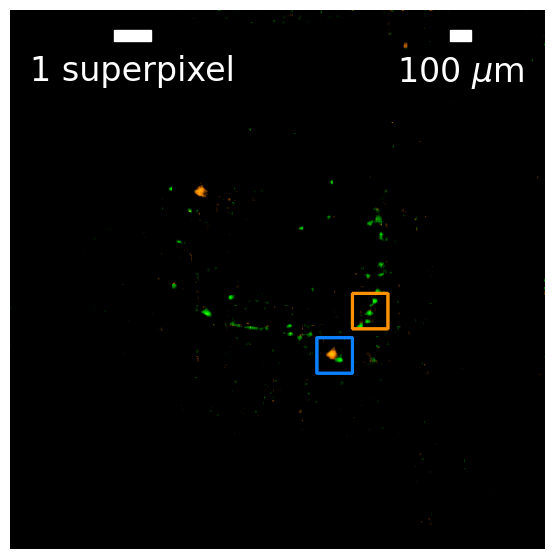

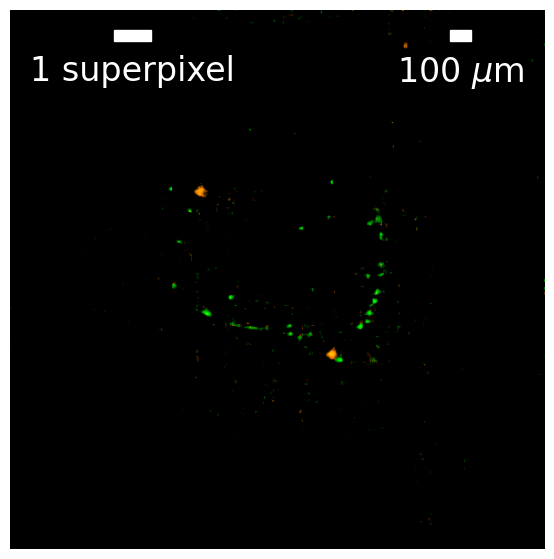

In [4]:
datafolder = '../Results/FOM2024'
file = 'multicolor_10umgreen_30umorange_low_rank_filter_new_vis.pt'

xk = torch.load(os.path.join(datafolder, file), map_location = 'cpu')
HSI_data = np.transpose(xk, (1,2,0))
HSI_data = np.reshape(HSI_data, [-1,xk.shape[0]])
false_color = sdc.HSI2RGB(wavelengths, HSI_data ,xk.shape[1],xk.shape[2], 65, False)
skip =[]#  [0,1]#[0,3]

bead_locations, recon_annotated = findbeadsinimage(false_color, 50, skip = skip ,maxnum = 2, label_bead = False)

# Display the image with boxes and labels
fig, ax = plt.subplots(figsize=(7, 7))
scalebar = drawscalebar(ax,superpixel_size,recon_pixel_size)
plt.imshow(recon_annotated**1.8*2)
plt.axis('off')
ax.add_artist(scalebar)
scalebarum = drawscalebar(ax, 100, recon_pixel_size, mag = mag_size, scalebarname='100 $\mu$m', loc = 'upper right')
ax.add_artist(scalebarum)
# Print the bead locations
for i, (cx, cy) in enumerate(bead_locations):
    print(f"Bead {i+1} - X: {cx}, Y: {cy}")

    # Display the image 
fig, ax = plt.subplots(figsize=(7, 7))
scalebar = drawscalebar(ax,superpixel_size,recon_pixel_size)
plt.imshow(false_color**1.8*2)
plt.axis('off')
ax.add_artist(scalebar)
scalebarum = drawscalebar(ax, 100, recon_pixel_size, mag = mag_size, scalebarname='100 $\mu$m', loc = 'upper right')
ax.add_artist(scalebarum)


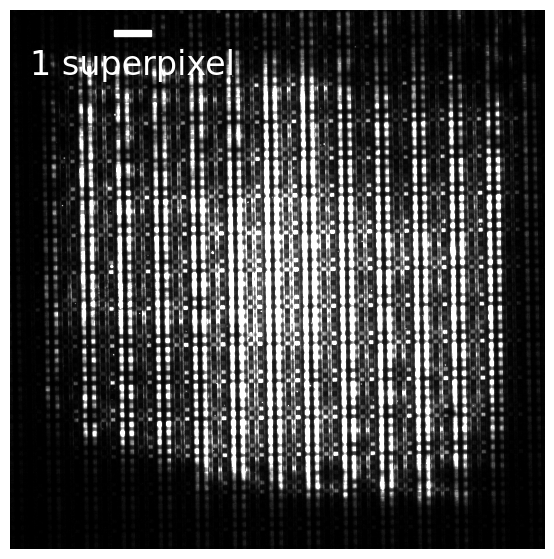

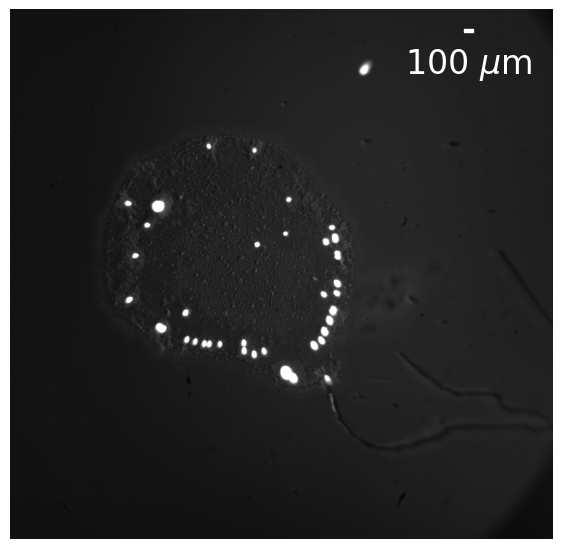

In [5]:
# crop_indices = [420,1852,1150,2826] #top bottom left default: [320,1652,1350,2726]
crop_indices = [680,1652,1600,2564]

datafolder = '/media/azuldata/neerja/2024-01-30/multicolor_10umgreen_30umorange'
meas_name = 'meas.tiff'
bg_name = 'bg.tiff'

bits = 16
power = 1
sample_meas = sdc.importTiff(datafolder,meas_name)/2**bits
try:
    background = sdc.importTiff(datafolder,bg_name)/2**bits
except:
    print('No background image found, continuing without background subtraction')
    background = torch.zeros(sample_meas.shape)
measurement = sdc.cropci((sample_meas-background),crop_indices).clip(0,1)**power

fig,ax = plt.subplots(figsize = (7,7))

plt.imshow(measurement, cmap='gray')
# plt.colorbar()  
plt.clim([0,.1])
plt.axis('off')

scalebar = drawscalebar(ax, superpixel_size,spectral_camera_pixel_size)
ax.add_artist(scalebar)

# draw groundtruth
gt_name = 'gt.tiff'

# load sample and background both located in datafolder
gt = sdc.importTiff(datafolder,gt_name)/2**bits
gt = gt/torch.max(gt)

import scipy.ndimage as ndimage

# Rotate the image without zero-padding
gt_rot = ndimage.rotate(gt, -90, reshape=True)

fig,ax = plt.subplots(figsize = (7,7))
plt.imshow(gt_rot,cmap='gray')
plt.axis('off')
plt.ylim([2300,300])
scalebar = drawscalebar(ax, 100,gt_pixel_size,mag = gt_mag_size, scalebarname='100 $\mu$m', loc = 'upper right')
ax.add_artist(scalebar)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


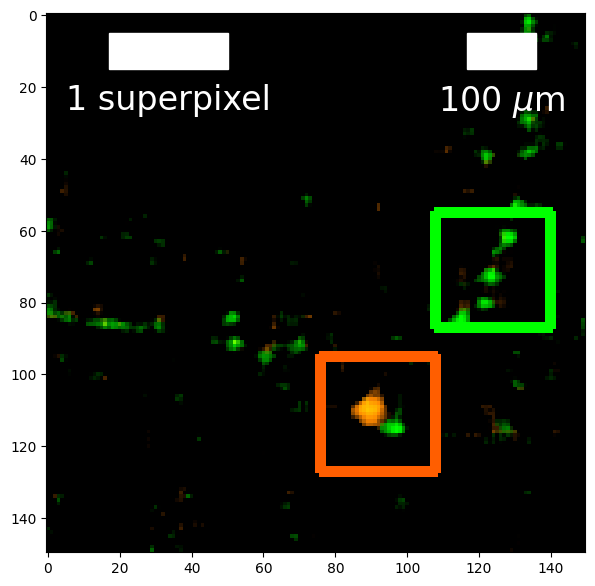

In [6]:
zoom = false_color[200:350,200:350,:]
white = (255,255,255)
green = (0,255,0)
orange = (0,100,255)
use_colors = [orange,green]

zoom_bead_locations, zoom_annotated = findbeadsinimage(zoom, 50, skip = skip ,maxnum = 2, label_bead = False, colindices = [0,1], use_colors = use_colors)
    # Display the image 
fig, ax = plt.subplots(figsize=(7, 7))
scalebar = drawscalebar(ax,superpixel_size,recon_pixel_size)
plt.imshow(zoom_annotated**1.8*2)
# plt.axis('off')
ax.add_artist(scalebar)
scalebarum = drawscalebar(ax, 100, recon_pixel_size, mag = mag_size, scalebarname='100 $\mu$m', loc = 'upper right')
ax.add_artist(scalebarum)


## Import ground truth spectra

['#Thorlabs FTS']
['#Thorlabs FTS']
1207
450.0450134
2728
799.9866333


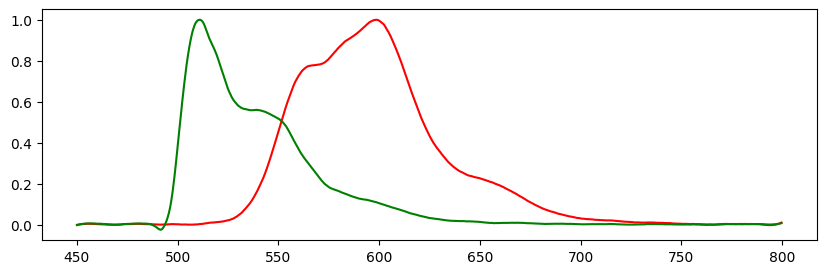

In [7]:
#import ground truth spectra 

green_beads = '/media/azuldata/neerja/2022-04-08/greenbeads_oldslide_emissionspectra.csv'
red_beads = '/media/azuldata/neerja/2022-04-08/redbeads_fresh_emissionspectra.csv'
import csv
file = open(green_beads)
csvreader = csv.reader(file)
header = next(csvreader)
print(header)
rows = []
for row in csvreader:
#     print(row)
    rows.append(row)
file.close()
green_spec = rows[32:-1]
g_wavelength = []
g_intensity = []
for ii in green_spec:
    vals = ii[0].split(';')
    g_wavelength.append(float(vals[0]))
    g_intensity.append(float(vals[1]))

file = open(red_beads)
csvreader = csv.reader(file)
header = next(csvreader)
print(header)
rows = []
for row in csvreader:
#     print(row)
    rows.append(row)
file.close()
green_spec = rows[32:-1]
r_wavelength = []
r_intensity = []
for ii in green_spec:
    vals = ii[0].split(';')
    r_wavelength.append(float(vals[0]))
    r_intensity.append(float(vals[1]))

    # cut to wvnew and filter and normalize
from scipy.signal import savgol_filter

rwv = np.array(r_wavelength)
idxmin = np.where(abs(rwv-wvmin) == np.amin(abs(rwv-wvmin)))[0][0]
idxmax = np.where(abs(rwv-wvmax) == np.amin(abs(rwv-wvmax)))[0][0]
print(idxmin)
print(rwv[idxmin])
print(idxmax)
print(rwv[idxmax])

rwvn = rwv[idxmin:idxmax]
rint = np.array(r_intensity)
rintn = savgol_filter(rint[idxmin:idxmax],91,3) #cut and filter
rintn = rintn/np.amax(rintn)

gwv = np.array(g_wavelength)
gint = np.array(g_intensity)
gwvn = gwv[idxmin:idxmax]
gintn = savgol_filter(gint[idxmin:idxmax],91,3) #cut and filter
gintn = gintn/np.amax(gintn)

plt.figure(figsize = (10,3))
plt.plot(rwvn,rintn,'r')
plt.plot(gwvn,gintn,'g')

## Plot spectra

[(292, 311), (324, 271)]


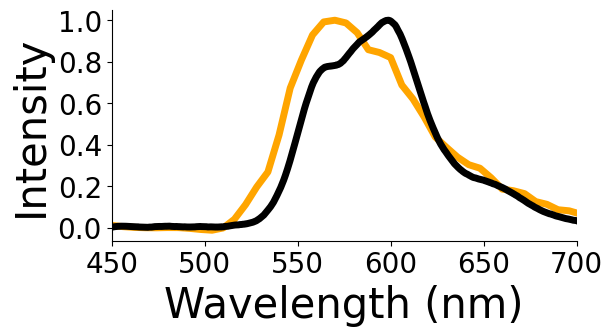

In [8]:
print(bead_locations)
orange_bead = xk[:,bead_locations[0][1],bead_locations[0][0]]
orange_bead = orange_bead/np.amax(orange_bead)
orange_bead_fil = savgol_filter(orange_bead,10,3)
orange_bead_fil = orange_bead_fil/np.amax(orange_bead_fil)

plt.figure(figsize = (6,3))
# plt.plot(wavelengths, orange_bead, color='orange', linewidth=2.5)
plt.plot(wavelengths, orange_bead_fil, color='orange', linewidth=5)

plt.xlabel('Wavelength (nm)', fontsize=30)
plt.ylabel('Intensity', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([450,700])
plt.plot(rwvn,rintn,'k', linewidth=5)
# plt.plot(wavelengths_gt, spectra_gt[:,1],'k',linewidth=2.5)
# Turn off the box
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

[(292, 311), (324, 271)]


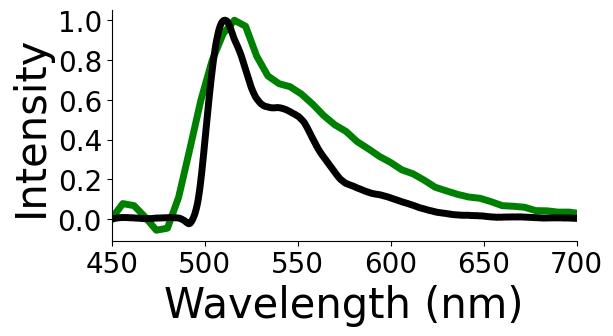

In [9]:
print(bead_locations)
green_bead = xk[:,bead_locations[1][1],bead_locations[1][0]]
green_bead = green_bead/np.amax(green_bead)
green_bead_fil = savgol_filter(green_bead,10,3)
green_bead_fil = green_bead_fil/np.amax(green_bead_fil)

plt.figure(figsize = (6,3))
# plt.plot(wavelengths, orange_bead, color='orange', linewidth=2.5)
plt.plot(wavelengths, green_bead_fil, color='green', linewidth=5)

plt.xlabel('Wavelength (nm)', fontsize=30)
plt.ylabel('Intensity', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([450,700])
plt.plot(gwvn,gintn,'k', linewidth=5)
# plt.plot(wavelengths_gt, spectra_gt[:,1],'k',linewidth=2.5)
# Turn off the box
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

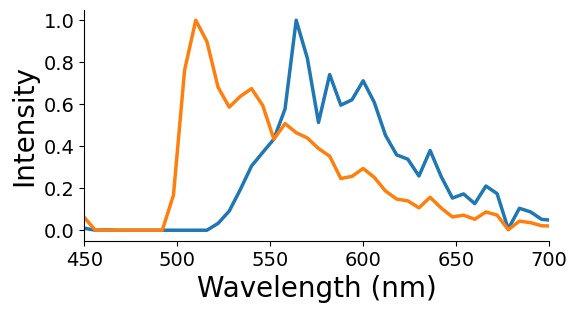

In [10]:
# plot the spectra
spectra = np.zeros((len(bead_locations), xk.shape[0]))
plt.figure(figsize=(6, 3))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for i, (cx, cy) in enumerate(bead_locations):
    spectra[i,:] = xk[:,cy,cx]/np.max(xk[:,cy,cx])
    plt.plot(wavelengths, spectra[i, :].T, color=colors[i], linewidth=2.5)

plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([450,700])
# plt.plot(wavelengths_gt, spectra_gt[:,1],'k',linewidth=2.5)
# Turn off the box
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)